# **Examining the History of Lego Sets**
## Project Description
[Project_link](https://app.datacamp.com/learn/projects/2378)

The Rebrickable dataset includes data on every LEGO set that has ever been sold (between 1999 & 2017); the names of the sets, what bricks they contain, etc. It might be small bricks, but this is big data! In this project, we will use this dataset together with the pandas library to dig into the history of Lego's licensed sets, including uncovering the percentage of all licensed sets that are Star Wars themed.

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

The introduction of its first licensed series, Star Wars, was a hit that sparked a series of collaborations with more themed sets. The partnerships team has asked you to perform an analysis of this success, and before diving into the analysis, they have suggested reading the descriptions of the two datasets to use, reported below.

## The Data

A summary and preview of the 2 datasets we'll use are provided below.

#### lego_sets.csv

| Column     | Description              |
|------------|--------------------------|
| `"set_num"` | A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid! |
| `"name"` | The name of the set. |
| `"year"` | The date the set was released. |
| `"num_parts"` | The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable. |
| `"theme_name"` | The name of the sub-theme of the set. |
| `"parent_theme"` | The name of the parent theme the set belongs to. Matches the name column of the parent_themes csv file.
|

#### parent_themes.csv

| Column     | Description              |
|------------|--------------------------|
| `"id"` | A code that is unique to every theme. |
| `"name"` | The name of the parent theme. |
| `"is_licensed"` | A Boolean column specifying whether the theme is a licensed theme. |

### Import Libraries & Datasets

In [18]:
# Import modules, read and inspect the datasets
import pandas as pd
import matplotlib.pyplot as plt

lego_sets = pd.read_csv('lego_sets.csv')

parent_themes = pd.read_csv('parent_themes.csv')

print(f'The Lego Sets DataFrame first few rows:\n{lego_sets.head()}\n')
print(f'The Lego Parent Theme DataFrame first few rows:\n{parent_themes.head()}\n')

The Lego Sets DataFrame first few rows:
  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
3        Space  
4        Space  

The Lego Parent Theme DataFrame first few rows:
    id     name  is_licensed
0    1  Technic        False
1   22  Creator        False
2   50     Town        False
3  112   Racers        False
4  126    Space        False



### Analysis of Licensed LEGO Sets: Focus on Star Wars

**Objective:**  
Determine the proportion of LEGO's licensed sets that are themed around Star Wars.

**Methodology:**  
- **Data Cleaning:** Removed entries with missing values to ensure data integrity.
- **Data Integration:** Performed a left join between `lego_sets` and `parent_themes` datasets to associate each set with its parent theme.
- **Filtering Licensed Sets:** Extracted sets marked as licensed to focus the analysis on collaborations with external franchises.
- **Identifying Star Wars Sets:** Queried the dataset for sets under the 'Star Wars' parent theme.
- **Calculation:** Computed the percentage of Star Wars sets among all licensed sets.

**Findings:**  
Approximately **45%** of all licensed LEGO sets ever released are Star Wars themed.

**Impact of Licensed Sets on LEGO's History:**  
The introduction of licensed themes, notably the Star Wars line in 1999, marked a pivotal shift in LEGO's product strategy. Facing financial challenges in the late 1990s, LEGO leveraged popular franchises to rejuvenate its brand and appeal to a broader audience. The success of the Star Wars sets not only revitalized sales but also established a blueprint for future collaborations with other franchises like Harry Potter and Marvel. This strategic pivot played a crucial role in transforming LEGO into a global entertainment powerhouse, blending traditional play with contemporary pop culture.

In [ ]:
#1. What percentage of all licensed sets ever released were Star Wars themed?

# Drop missing rows
lego_sets.dropna()
parent_themes.dropna()

# Left Join lego_sets->Left table, parent_themes->Right table
# That way, we can find the total num of licensed sets->licensed_sets
lego_parent_table = lego_sets.merge(parent_themes, left_on='parent_theme', right_on='name', how='left', suffixes=('_lego_set', '_parent_theme'))

licensed_sets = lego_parent_table[lego_parent_table['is_licensed'] == True]

# Query on the lego_sets to find the Star Wars parent themed sets
star_wars_sets = lego_sets.query('parent_theme == "Star Wars"')

# Use of len(), divide and multiply by 100 to find the percentage
the_force = (len(star_wars_sets) / len(licensed_sets)) * 100
the_force = int(round(the_force, 2))
print(f"{the_force}% of all licensed LEGO sets ever released were Star Wars themed.")

45% of all licensed LEGO sets ever released were Star Wars themed.


### Peak Year for LEGO Star Wars Set Releases

**Objective:**  
Identify the year with the highest number of LEGO Star Wars set releases.

**Methodology:**  
- **Data Filtering:** Extracted entries where the `parent_theme` is 'Star Wars'.
- **Aggregation:** Counted the number of sets released each year.
- **Identification:** Determined the year with the maximum count.

**Findings:**  
The analysis reveals that **2016** was the peak year for LEGO Star Wars set releases, with a total of **50** sets launched.

**Significance:**  
The surge in 2016 aligns with the heightened interest in the Star Wars franchise, particularly following the release of "Star Wars: The Force Awakens" in December 2015. LEGO capitalized on this momentum by expanding its Star Wars lineup, catering to both new and long-time fans. This strategic move not only boosted sales but also reinforced LEGO's position in the licensed merchandise market.

In [8]:
#2. In which year was the highest number of Star Wars sets released?
# Filter the dataset for Star Wars themed sets
star_wars_sets = lego_sets[lego_sets['parent_theme'] == 'Star Wars']

# Count the number of Star Wars sets released each year
sets_per_year = star_wars_sets['year'].value_counts().sort_index(ascending=False)

# Identify the year with the highest number of releases
max_year = sets_per_year.idxmax()
max_count = sets_per_year.max()

# Display the result in a descriptive sentence
print(f"In {max_year}, LEGO released the highest number of Star Wars sets, totaling {max_count} sets.")

In 2016, LEGO released the highest number of Star Wars sets, totaling 61 sets.


### Top 5 LEGO Parent Themes by Number of Sets Released

**Objective:**  
Identify the top five parent themes with the highest number of LEGO sets released over the years.

**Methodology:**  
- **Data Aggregation:** Utilized the `value_counts()` function to tally the number of sets associated with each parent theme.
- **Ranking:** Sorted the themes in descending order based on the count to determine the top five.

**Findings:**  
The analysis reveals the following top five parent themes:

1. **Town:** As one of LEGO's foundational themes introduced in 1978, Town sets depict everyday urban life, including emergency services, transportation, and civilian structures. Its extensive run and broad appeal have resulted in a substantial number of sets.

2. **Seasonal:** These sets are designed to celebrate various holidays and seasons, such as Christmas, Halloween, and Easter. Their recurring nature and annual releases contribute to their high count.

3. **Star Wars:** Since its inception in 1999, the Star Wars theme has been a significant part of LEGO's portfolio, offering a wide range of sets that cater to fans of the franchise. Its popularity is bolstered by continuous media releases and a dedicated fan base.

4. **Technic:** Introduced in 1977, Technic sets are known for their complex designs and mechanical functions, appealing to older children and adult builders interested in engineering concepts.

5. **Service Packs:** These are supplementary sets that provide additional parts or accessories to enhance existing sets. While not as prominent in recent years, their historical presence has contributed to a high number of releases.

**Significance:**  
Understanding which themes have the most sets provides insight into LEGO's strategic focus areas and consumer interests over time. Themes like Town and Technic highlight LEGO's commitment to educational and imaginative play, while the success of licensed themes like Star Wars underscores the importance of strategic partnerships in expanding LEGO's market reach.

**Further Exploration:**
Analyzing the evolution of these themes over time could offer deeper insights into trends and shifts in consumer preferences, as well as LEGO's adaptation to market demands.

In [9]:
#3. What are the top 5 parent themes with the most LEGO sets released over the years?
# Count the number of sets per parent theme
theme_counts = lego_sets['parent_theme'].value_counts()

# Extract the top 5 parent themes
top5_themes = theme_counts.head(5)

# Display the results in a descriptive format
print("The top 5 parent themes with the most LEGO sets released over the years are:")
for theme, count in top5_themes.items():
    print(f"- {theme}: {count} sets")


The top 5 parent themes with the most LEGO sets released over the years are:
- Town: 1116 sets
- Seasonal: 928 sets
- Star Wars: 609 sets
- Technic: 536 sets
- Service Packs: 456 sets


### Annual Production of Licensed LEGO Sets: A Temporal Analysis

**Objective:**  
To analyze the number of licensed LEGO sets produced each year and observe trends over time.

**Methodology:**  
- **Data Aggregation:** Counted the number of licensed sets released each year.
- **Visualization:** Plotted the annual counts to visualize trends and fluctuations.

**Findings:**  
The analysis reveals a significant increase in the production of licensed LEGO sets over the years. Starting with a modest number in the late 1990s, coinciding with the introduction of themes like Star Wars, the count has grown substantially, reflecting LEGO's strategic emphasis on licensed collaborations.

**Significance:**  
The upward trend underscores the importance of licensed themes in LEGO's portfolio. Collaborations with popular franchises have not only expanded LEGO's market reach but also catered to diverse consumer interests, contributing to sustained growth and innovation within the company.

**Further Exploration:**  
- **Correlation with Franchise Popularity:** Investigate how the popularity of specific franchises influences the number of sets released.
- **Market Impact Analysis:** Assess the impact of licensed sets on LEGO's overall sales and market share.
- **Consumer Demographics:** Explore the demographics of consumers purchasing licensed sets to tailor future collaborations.
- **Comparative Theme Analysis:** Compare the growth of licensed themes with original LEGO themes to evaluate strategic focus areas.

Number of licensed LEGO sets released each year:
1999: 13 sets
2000: 31 sets
2001: 28 sets
2002: 59 sets
2003: 43 sets
2004: 49 sets
2005: 37 sets
2006: 27 sets
2007: 23 sets
2008: 45 sets
2009: 48 sets
2010: 67 sets
2011: 83 sets
2012: 119 sets
2013: 101 sets
2014: 116 sets
2015: 117 sets
2016: 147 sets
2017: 179 sets


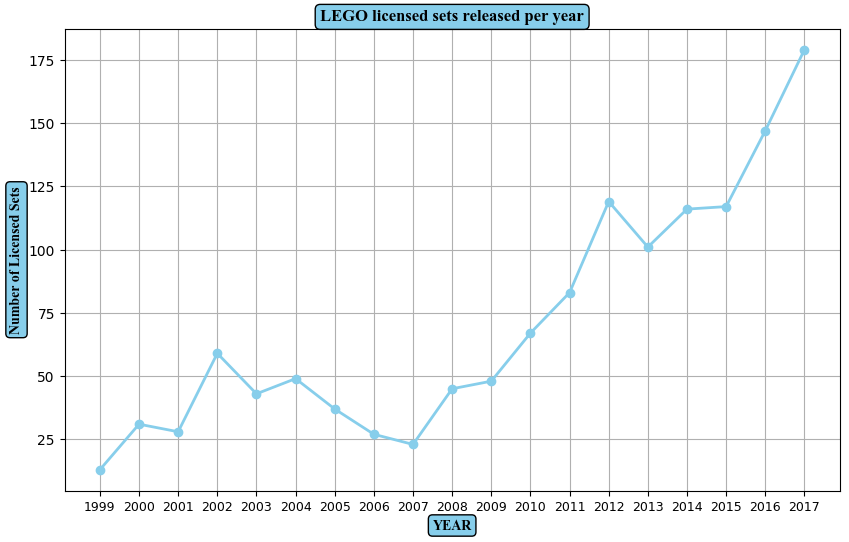

In [ ]:
#4. How many licensed LEGO sets were produced each year, and how has this changed over time?
# Count the number of licensed sets released each year
licensed_sets_per_year = licensed_sets['year'].value_counts().reset_index()
licensed_sets_per_year.columns = ['year', 'count']
licensed_sets_per_year = licensed_sets_per_year.sort_values('year')

# Display the counts
print("Number of licensed LEGO sets released each year:")
for _, row in licensed_sets_per_year.iterrows():
    print(f"{int(row['year'])}: {int(row['count'])} sets")


# Create Figure
plt.figure(figsize=(10,6))
plt.plot(
    licensed_sets_per_year['year'],
    licensed_sets_per_year['count'],
    marker='o',
    color='skyblue',
    linewidth=2
)
plt.xlabel('YEAR', 
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
xtcks_val = licensed_sets_per_year['year']
xtcks_lab = licensed_sets_per_year['year']
plt.xticks(xtcks_val, xtcks_lab,
           fontsize=9, 
           color='black',
           ha = 'center', 
           va = 'top')
plt.ylabel('Number of Licensed Sets', 
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.title('LEGO licensed sets released per year',
          fontname='Times New Roman',
          fontweight='bold',
          bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.grid(True)
plt.show()

### Analysis of Average Number of Parts per Set by Parent Theme

**Objective:**
To identify which LEGO parent themes have the highest average number of parts per set, providing insights into the complexity and design focus of various themes.

**Methodology:**

* **Data Aggregation:** Calculated the mean number of parts per set for each parent theme.
* **Ranking:** Identified the top 10 parent themes with the highest averages.
* **Visualization:** Created a horizontal bar chart to illustrate the differences.

**Findings:**
The analysis reveals the following top 10 parent themes by average number of parts per set:

1. **Disney:** 4,060.0 parts
2. **Sculptures:** 1,904.12 parts
3. **Modular Buildings:** 1,670.38 parts
4. **FIRST LEGO League:** 1,469.71 parts
5. **Model Team:** 725.88 parts
6. **LEGO Ideas and CUUSOO:** 629.22 parts
7. **Master Building Academy:** 616.54 parts
8. **Minecraft:** 595.55 parts
9. **Ghostbusters:** 552.0 parts
10. **Jurassic World:** 523.0 parts

Notably, the **Disney** theme stands out with an average of 4,060.0 parts per set, significantly surpassing the second-highest, **Sculptures**, which averages 1,904.12 parts. This indicates that Disney sets have, on average, 2,155.88 more parts than Sculptures sets, highlighting a substantial investment in complexity and detail.

**Significance:**
The substantial average part count in Disney sets suggests a focus on intricate designs and elaborate builds, likely aimed at adult enthusiasts and collectors. This aligns with the release of large-scale sets such as the **LEGO Disney Castle (set 43222)**, which comprises 4,837 pieces . Such sets not only offer a challenging building experience but also serve as impressive display pieces, reflecting LEGO's strategy to cater to a mature audience seeking detailed and immersive builds.

**Further Exploration:**

* **Temporal Trends:** Analyze how the average number of parts per theme has evolved over time.
* **Price Correlation:** Investigate the relationship between the number of parts and the retail price of sets.
* **Demographic Analysis:** Examine which age groups are most engaged with complex themes like Disney and Sculptures.
* **Educational Impact:** Assess how themes with higher complexity contribute to learning outcomes in STEM education.

Top 10 Parent Themes by Average Number of Parts per Set:
1. Disney: 4060.0 parts
2. Sculptures: 1904.12 parts
3. Modular Buildings: 1670.38 parts
4. FIRST LEGO League: 1469.71 parts
5. Model Team: 725.88 parts
6. LEGO Ideas and CUUSOO: 629.22 parts
7. Master Building Academy: 616.54 parts
8. Minecraft: 595.55 parts
9. Ghostbusters: 552.0 parts
10. Jurassic World: 523.0 parts


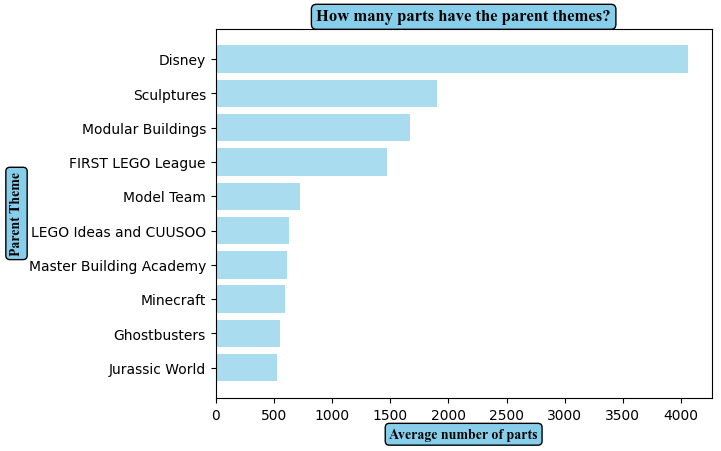


The parent theme with the highest average number of parts per set is 'Disney' with an average of 4060.0 parts.
The second highest is 'Sculptures' with an average of 1904.12 parts.
This indicates that 'Disney' sets have, on average, 2155.88 more parts than 'Sculptures' sets, highlighting a significant investment in complexity and detail.


In [33]:
#5. Which parent theme has the highest average number of parts per set, and how does it compare to other themes?
# Calculate the average number of parts per set for each parent theme
mean_parts_per_theme = lego_sets.groupby('parent_theme')['num_parts'].mean().round(2)

# Identify the parent theme with the highest average number of parts
max_mean_theme = mean_parts_per_theme.idxmax()
max_mean_value = mean_parts_per_theme.max()

# Prepare the top 10 themes for visualization
top10_themes = mean_parts_per_theme.sort_values(ascending=False).head(10).reset_index()
top10_themes.columns = ['Parent Theme', 'Average Number of Parts']

# Display the top 10 themes
print("Top 10 Parent Themes by Average Number of Parts per Set:")
for index, row in top10_themes.iterrows():
    print(f"{index + 1}. {row['Parent Theme']}: {row['Average Number of Parts']} parts")


plt.barh(
    top10_themes['Parent Theme'],
    top10_themes['Average Number of Parts'],
    color='skyblue',
    alpha=0.7
)
plt.xlabel('Average number of parts',
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.gca().invert_yaxis()  # Highest values on top
plt.ylabel('Parent Theme',
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.title('How many parts have the parent themes?',
          fontname='Times New Roman',
          fontweight='bold',
          bbox=dict(facecolor='skyblue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.show()

# Comparative analysis
second_theme = top10_themes.iloc[1]
print(f"\nThe parent theme with the highest average number of parts per set is '{max_mean_theme}' with an average of {max_mean_value} parts.")
print(f"The second highest is '{second_theme['Parent Theme']}' with an average of {second_theme['Average Number of Parts']} parts.")
difference = max_mean_value - second_theme['Average Number of Parts']
print(f"This indicates that '{max_mean_theme}' sets have, on average, {difference} more parts than '{second_theme['Parent Theme']}' sets, highlighting a significant investment in complexity and detail.")